In [298]:
import numpy as np
import pandas as pd


In [299]:
df = pd.read_csv('spam.csv', encoding="ISO-8859-1")

In [300]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3647,ham,As per your request 'Maangalyam (Alaipayuthe)'...,NaN,NaN,NaN
348,spam,Fancy a shag? I do.Interested? sextextuk.com t...,NaN,NaN,NaN
5058,spam,Free video camera phones with Half Price line ...,NaN,NaN,NaN
1891,ham,Probably earlier than that if the station's wh...,NaN,NaN,NaN
4211,spam,Missed call alert. These numbers called but le...,NaN,NaN,NaN


In [301]:
df.shape

(5572, 5)

## `Processes followed during this spam detection`

- ### 1.  Data Cleaning
- ### 2.  EDA
- ### 3.  Text Preprocessing (vectorization, stemming)
- ### 4. Model Building
- ### 5. Evaluation 
- ### 6. Improvement
- ### 7. Website Building
- ### 8. Deploying

##  1. Data Cleaning

In [302]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [303]:
df.drop(columns=["Unnamed: 4", "Unnamed: 2", "Unnamed: 3"], inplace=True)

In [304]:
df.sample(5)

,v1,v2
3063,ham,Ok. How many should i buy.
1199,ham,NEFT Transaction with reference number &lt;#&...
1476,ham,I'm watching lotr w my sis dis aft. So u wan 2...
2175,ham,I'm at work. Please call
2565,ham,I told her I had a Dr appt next week. She thin...


In [305]:
df.rename(columns={'v1': "target", "v2": "text"}, inplace=True)

In [306]:
df.sample(5)

,target,text
5564,ham,Why don't you wait 'til at least wednesday to ...
2571,ham,Û_ and donÛ÷t worry weÛ÷ll have finished by...
1494,ham,It has everything to do with the weather. Keep...
2833,ham,U sick still can go shopping?
5388,ham,NOT MUCH NO FIGHTS. IT WAS A GOOD NITE!!


In [307]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [308]:
encoder.fit_transform(df.target)

array([0, 0, 1, ..., 0, 0, 0])

In [309]:
df.target = encoder.fit_transform(df.target)
df.sample(5)

,target,text
2070,1,Sexy Singles are waiting for you! Text your AG...
4293,1,Kit Strip - you have been billed 150p. Netcoll...
4472,0,S but not able to sleep.
620,0,Dear we got &lt;#&gt; dollars hi hi
735,0,Then why no one talking to me


In [310]:
# check for null values
df.isnull().sum()

target    0
text      0
dtype: int64

In [311]:
# checking for duplicate values
print(df.duplicated().sum())
print("Shape Before {}".format(df.shape))

403
Shape Before (5572, 2)


In [312]:
# remove duplicated
df.drop_duplicates(keep='first', inplace=True)
print("Shape After {}".format(df.shape))

Shape After (5169, 2)


# 2. EDA

In [313]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

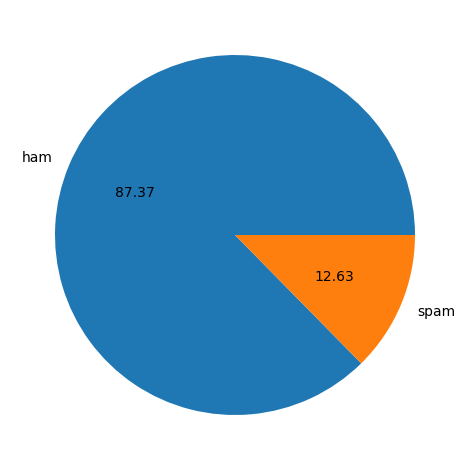

In [314]:
import matplotlib.pyplot as plt
plt.pie(df.target.value_counts(), labels=['ham', "spam"], autopct="%0.2f")
plt.tight_layout()
plt.show()

### The data is quite imbalanced since the % of ham is more than % of spam

In [315]:
import nltk

In [316]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [317]:
df['num_character'] = df['text'].apply(len)

In [318]:
df.head()

,target,text,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [319]:
# fetching no. of text
df.text.apply(lambda x: nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [320]:
df['num_word'] = df.text.apply(lambda x: len(nltk.word_tokenize(x)))

In [321]:
df.sample(5)

,target,text,num_character,num_word
1645,0,I.ll post her out l8r. In class,31,8
726,0,Of cos can lar i'm not so ba dao ok... 1 pm lo...,140,40
2266,1,<Forwarded from 88877>FREE entry into our å£25...,122,26
240,0,Tomarrow final hearing on my laptop case so i ...,51,11
704,0,True dear..i sat to pray evening and felt so.s...,75,19


In [322]:
# similarly for calculating no of sentence we use sentence tokenizer
df['num_sentence'] = df.text.apply(lambda x: len(nltk.sent_tokenize(x)))
df.sample(5)

,target,text,num_character,num_word,num_sentence
4638,0,Of course. I guess god's just got me on hold r...,55,15,2
2185,0,Purity of friendship between two is not about ...,142,26,2
1549,0,Dude sux for snake. He got old and raiden got ...,50,12,2
1937,0,The fact that you're cleaning shows you know w...,106,23,2
4205,0,"Get the door, I'm here",22,7,1


In [323]:
df[['num_character', 'num_word', 'num_sentence']].describe()

,num_character,num_word,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [324]:
df[df.target==0][['num_character', 'num_word', 'num_sentence']].describe()

,num_character,num_word,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [325]:
df[df.target==1][['num_character', 'num_word', 'num_sentence']].describe()

,num_character,num_word,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [326]:
import seaborn as sns

<AxesSubplot:xlabel='num_character', ylabel='Count'>

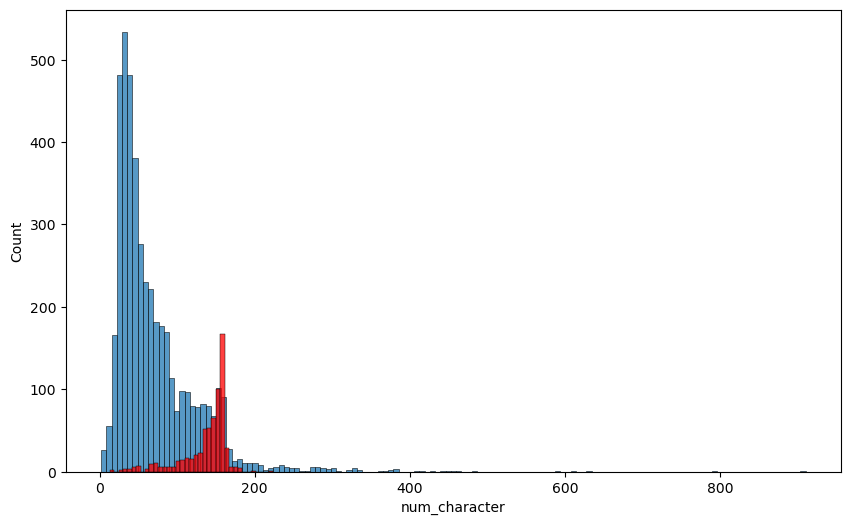

In [327]:
plt.figure(figsize=(10, 6))
sns.histplot(df[df.target==0]['num_character'])
sns.histplot(df[df.target==1]['num_character'], color='red')
# the avg character in spam is greater than average character in ham

<AxesSubplot:xlabel='num_word', ylabel='Count'>

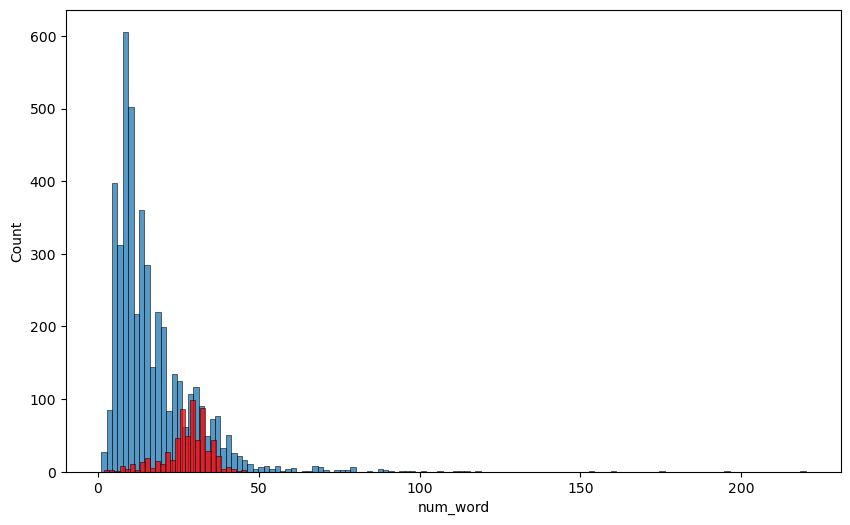

In [328]:
plt.figure(figsize=(10, 6))
sns.histplot(df[df.target==0]['num_word'])
sns.histplot(df[df.target==1]['num_word'], color='red')

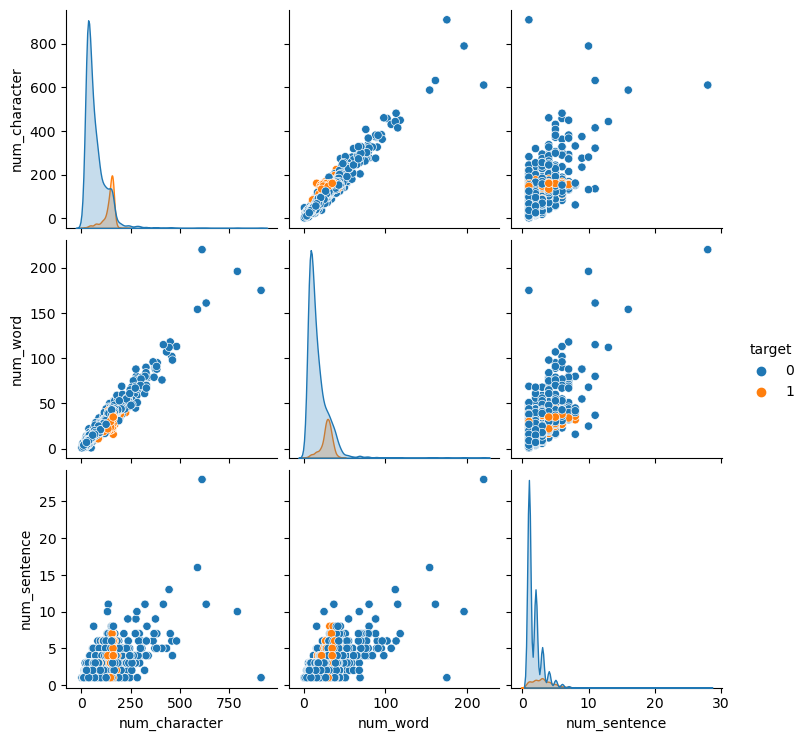

In [329]:
sns.pairplot(df, hue='target')

<AxesSubplot:>

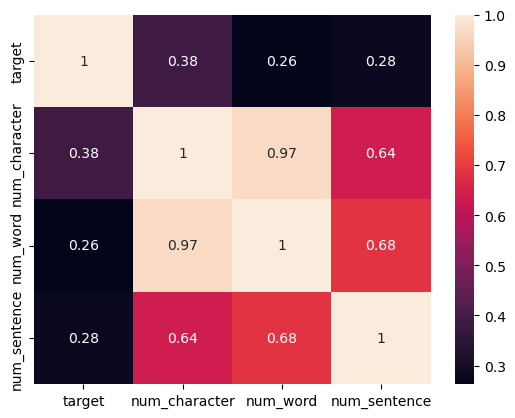

In [330]:
sns.heatmap(df.corr(), annot=True)

Here, the `num_character` has highest correlation with `target` 

# 3. Data Preprocessing for textual data
- lower case
- Tokenization (breaking into words)
- Removing Special Characters
- Removing stop word and punctutation
- Stemming (changing all form of words(v5, v3,v2, v4) into v1. Eg danced, dancing into dance 

In [331]:
# let's create a function to do all these tasks
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if (i.isalpha()):
            y.append(i)
    
    stop_word = stopwords.words('english')
    punctuation = string.punctuation
    stemmer = PorterStemmer()
    
    new_list = []
    
    for i in y:
        if i in stop_word or i in punctuation:
            y.remove(i)
        
    for i in y:
        new_list.append(stemmer.stem(i))
    
    return " ".join(new_list)

In [332]:
transform_text(("who let the dog ramechor? OKK fighting dancing are banned here..."))

'let dog ramechor okk fight danc ban'

In [333]:
df['transformed_text'] = df.text.apply(transform_text)

In [334]:
df.sample(5)

,target,text,num_character,num_word,num_sentence,transformed_text
4056,0,Noice. Text me when you're here,31,8,2,noic text when here
4402,0,Just getting back home,22,4,1,get back home
853,0,\AH POOR BABY!HOPE URFEELING BETTERSN LUV! PRO...,118,26,2,poor babi hope urfeel bettersn luv probthat ov...
3822,0,Please protect yourself from e-threats. SIB ne...,159,27,3,pleas protect from sib never ask sensit inform...
3272,0,Just finished eating. Got u a plate. NOT lefto...,61,14,3,finish eat got u plate leftov time


In [335]:
from wordcloud import WordCloud
wc = WordCloud(height=500, width=500, background_color='white', min_font_size=10)

In [336]:
spam_wc = wc.generate(df[df.target==1]['transformed_text'].str.cat(sep=" "))

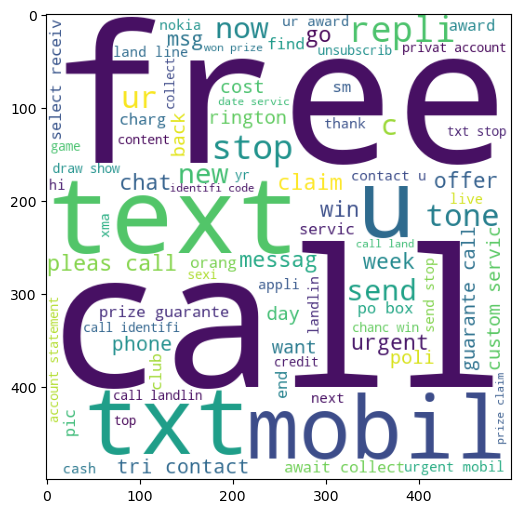

In [337]:
plt.figure(figsize=(6,7))
plt.imshow(spam_wc)

In [338]:
ham_wc = wc.generate(df[df.target==0]['transformed_text'].str.cat(sep=" "))

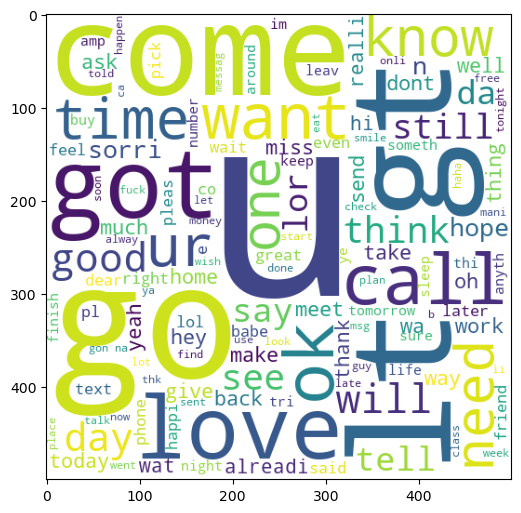

In [339]:
plt.figure(figsize=(6,7))
plt.imshow(ham_wc)

## Viewing the top 30 words in our ham and spam messages

In [340]:
spam_word = []
for msg in df[df.target==1]['transformed_text'].to_list():
    for word in msg.split():
        spam_word.append(word)
   

In [341]:
len(spam_word)

9333

In [342]:
np.array(pd.DataFrame(spam_word).value_counts()[:30].index) 
# the index method returns MultiIndex object which should be converted to array

array([('call',), ('free',), ('a',), ('txt',), ('text',), ('ur',), ('u',),
       ('mobil',), ('stop',), ('repli',), ('claim',), ('your',), ('you',),
       ('prize',), ('get',), ('the',), ('have',), ('new',), ('servic',),
       ('tone',), ('send',), ('to',), ('urgent',), ('nokia',),
       ('contact',), ('award',), ('is',), ('phone',), ('cash',),
       ('pleas',)], dtype=object)

In [343]:
# convert tuple inside array to string
x = np.array(pd.DataFrame(spam_word).value_counts()[:30].index)
X = ([x[0] for x in x])
print(X)

['call', 'free', 'a', 'txt', 'text', 'ur', 'u', 'mobil', 'stop', 'repli', 'claim', 'your', 'you', 'prize', 'get', 'the', 'have', 'new', 'servic', 'tone', 'send', 'to', 'urgent', 'nokia', 'contact', 'award', 'is', 'phone', 'cash', 'pleas']


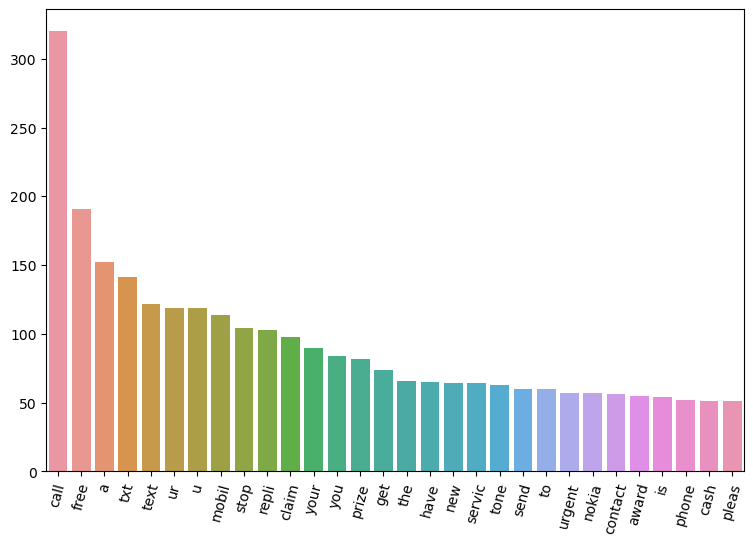

In [344]:
plt.figure(figsize=(9,6))
sns.barplot(x=X, y=pd.DataFrame(spam_word).value_counts()[:30].values)
plt.xticks(rotation=75)
plt.show()

In [345]:
# Similarly for ham msg
ham_msg =[]
for msg in df[df.target==0]['transformed_text'].to_list():
    for word in msg.split(" "):
        ham_msg.append(word)

In [346]:
x = pd.DataFrame(ham_msg).value_counts()[:30].index
X = [x[0] for x in x]
print(X)

['u', 'i', 'you', 'the', 'a', 'go', 'get', 'gt', 'lt', 'come', 'to', 'got', 'know', 'like', 'call', 'do', 'time', 'ok', 'my', 'love', 'good', 'have', 'want', 'are', 'it', 'ur', 'day', 'that', 'in', 'need']


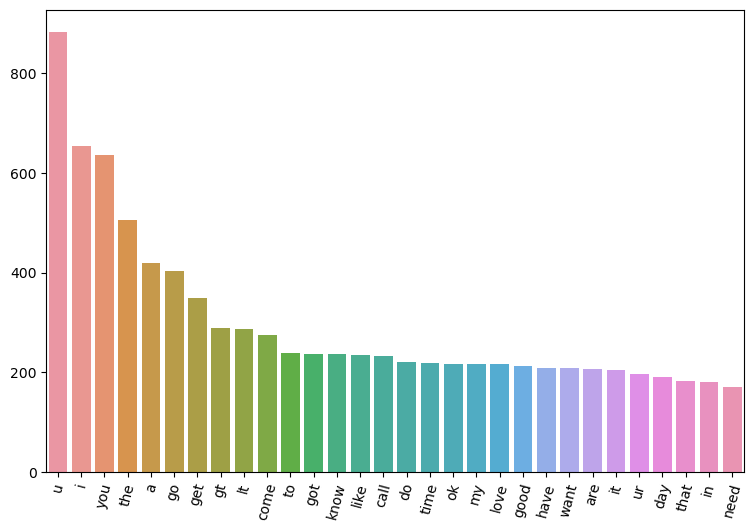

In [347]:
plt.figure(figsize=(9,6))
sns.barplot(x=X, y=pd.DataFrame(ham_msg).value_counts()[:30].values)
plt.xticks(rotation=75)
plt.show()

# 4. Model Building

In [348]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [349]:
X = tfidf.fit_transform(df.transformed_text).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [350]:
X.shape
# It has 5169 sms and 5928 words

(5169, 3000)

In [351]:
y = df.target.values

In [352]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [353]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score


In [354]:
# for textual data, naive bayes works fine
gnb  = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [355]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(precision_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))

0.8704061895551257
0.5246636771300448
[[783 106]
 [ 28 117]]


In [356]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(precision_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))

0.9690522243713733
0.991304347826087
[[888   1]
 [ 31 114]]


In [357]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(precision_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))

0.9777562862669246
0.9621212121212122
[[884   5]
 [ 18 127]]


In [358]:
## since using tfidf with MNB give precision score of 99%, 
## let's check accuracy of other ml algorithms
!pip install xgboost

In [359]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [360]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)


In [361]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [362]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [363]:
train_classifier(svc,X_train,y_train,X_test,y_test)


(0.9748549323017408, 0.9473684210526315)

In [364]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9748549323017408
Precision -  0.9473684210526315


C:\Users\Acer\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


For  KN
Accuracy -  0.9110251450676983
Precision -  1.0
For  NB
Accuracy -  0.9690522243713733
Precision -  0.991304347826087
For  DT
Accuracy -  0.9294003868471954
Precision -  0.8103448275862069
For  LR
Accuracy -  0.9458413926499033
Precision -  0.8869565217391304
For  RF
Accuracy -  0.9690522243713733
Precision -  0.991304347826087
For  AdaBoost
Accuracy -  0.9555125725338491
Precision -  0.8666666666666667
For  BgC
Accuracy -  0.965183752417795
Precision -  0.8978102189781022
For  ETC
Accuracy -  0.9729206963249516
Precision -  0.968
For  GBDT
Accuracy -  0.9458413926499033
Precision -  0.9405940594059405
For  xgb
Accuracy -  0.9709864603481625
Precision -  0.96


In [365]:
performance = pd.DataFrame({"Algorithms": clfs.keys(), "Accuracy": accuracy_scores, "Precision":precision_scores})
performance

,Algorithms,Accuracy,Precision
0,SVC,0.974855,0.947368
1,KN,0.911025,1.000000
2,NB,0.969052,0.991304
3,DT,0.929400,0.810345
4,LR,0.945841,0.886957
5,RF,0.969052,0.991304
6,AdaBoost,0.955513,0.866667
7,BgC,0.965184,0.897810
8,ETC,0.972921,0.968000
9,GBDT,0.945841,0.940594


In [366]:
performance_melt = pd.melt(performance, id_vars=['Algorithms'], value_vars=['Accuracy', "Precision"])

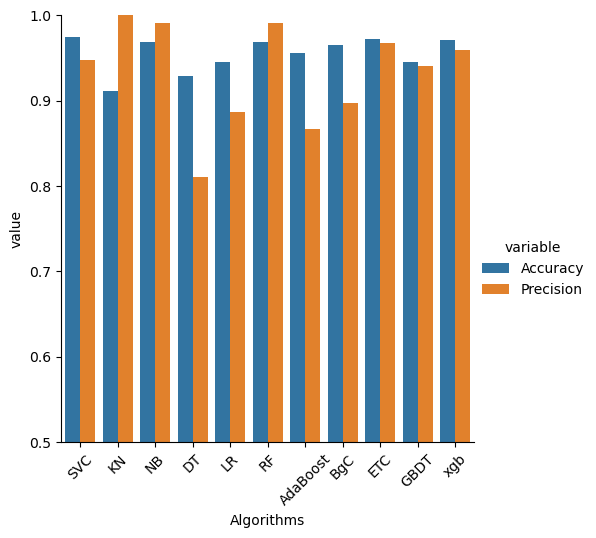

In [367]:
sns.catplot(x='Algorithms', y='value', hue='variable',
            data=performance_melt, kind="bar", height=5)
plt.ylim(0.5, 1.0)
plt.xticks(rotation=45)
plt.show()

In [368]:
# changing the max_feature parameter of tf-idf to 3000

In [369]:
# temp_df = pd.DataFrame({"Algorithms": clfs.keys(), "Accuracy_3000": accuracy_scores, "Precision_3000": precision_scores})

In [370]:
# performance_melt = performance_melt.merge(temp_df, on='Algorithms')
performance_melt

,Algorithms,variable,value,Accuracy_3000,Precision_3000
0,SVC,Accuracy,0.974855,0.974855,0.947368
1,SVC,Precision,0.947368,0.974855,0.947368
2,KN,Accuracy,0.911025,0.911025,1.000000
3,KN,Precision,1.000000,0.911025,1.000000
4,NB,Accuracy,0.969052,0.969052,0.991304
5,NB,Precision,0.991304,0.969052,0.991304
6,DT,Accuracy,0.929400,0.929400,0.810345
7,DT,Precision,0.810345,0.929400,0.810345
8,LR,Accuracy,0.945841,0.945841,0.886957
9,LR,Precision,0.886957,0.945841,0.886957


In [371]:
import pickle
pickle.dump(tfidf, open("vectorizer.pkl", 'wb'))
pickle.dump(mnb, open("mnb.pkl", 'wb'))

In [372]:
pickle.dump(mnb, open("mnb1.pkl", 'wb'))